In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import datetime as dt
import plotly.express as px

np.set_printoptions(suppress=True)

In [2]:
path = r"C:\Users\HomePC\Documents\dataset\Bank customer details.xlsx"

In [3]:
files = pd.ExcelFile(path)

In [4]:
files_name = files.sheet_names
files_name

['Customer', 'Accounts', 'Loan', 'Transaction', 'Transaction time']

In [5]:
dfs = [files.parse(i) for i in range(len(files_name))]
cus_df, acc_df, loan_df, trans_df, trans_time_df = dfs

In [6]:
all_dfs = [cus_df, acc_df, loan_df, trans_df, trans_time_df]

for i, j in zip(all_dfs, files_name):
    print('-' * 120)
    print('-' * 120)
    print(f'                                      {j}  dataset')
    display(i.head())
    print('-' * 120)
    display(i.shape)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
                                      Customer  dataset


,Customer_id,Account Number,Age,Date of Birth,Sex,Occupation,City,Bank Deposit,Saving Accounts,Full name,Unnamed: 10
0,NZ78803,719704224,23,1999-05-25 06:00:00,Female,Computer Systems Analyst II,Lagos,455923.6864_x0002_,228189.805043,Charles Martin,NaN
1,NZ33202,131217921,32,1990-05-25 00:00:00,Female,Help Desk Operator,Lagos,744629.027436_x0002_,206014.030924,Ernest Davis,NaN
2,NZ82919,17250555,80,1942-05-25 00:00:00,Female,Web Designer IV,Lagos,128075.883088_x0002_,142091.734445,Nancy Gilbert,NaN
3,NZ57563,255183298,33,1989-05-24 18:00:00,Female,Statistician II,Lagos,3056394.35322_x0002_,737637.187529,Willie Owens,NaN
4,NZ59334,600576973,85,1937-05-24 18:00:00,Female,Budget/Accounting Analyst III,Lagos,549814.16554_x0002_,223400.906696,William Hart,NaN


------------------------------------------------------------------------------------------------------------------------


(3011, 11)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
                                      Accounts  dataset


,Customer_id,Account Number,City id,Account_Open_Date,Account Type,Account officer,Opening Balance
0,NZ48905,909028330,Riv-HR001,2012-05-25,Joint,Mark Montgomery,"291120,6408"
1,NZ80436,827410722,Lag-HR001,2008-05-25,Savings,Benjamin Kim,"132696,4716"
2,NZ59205,22623932,Del-HR001,1999-05-24,Joint,Todd Roberts,"207771,2832"
3,NZ87441,48126440,Kog-HR001,2012-05-25,Current,Shawn Cook,"253649,8125"
4,NZ45102,826302558,Enu-HR001,2019-05-24,Corporate,Paul Holmes,"43815,1168"


------------------------------------------------------------------------------------------------------------------------


(3000, 7)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
                                      Loan  dataset


,Customer_id,Account Number,City id,Bank Loans
0,NZ87901,285351921,Kog-HR001,N4116633003
1,NZ59380,919496575,Abu-HR001,N2660428992
2,NZ96496,238274446,Abu-HR001,N9237412968
3,NZ33044,206071219,Enu-HR001,"N150301,08"
4,NZ75060,46822267,Riv-HR001,N224641419


------------------------------------------------------------------------------------------------------------------------


(300, 4)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
                                      Transaction  dataset


,Transaction_id,Account Number,Transaction type,Transaction Medium,Date_of_transaction,Amount
0,MT001,352133027,Money Transfer,Mobile,2021-10-07,NGN28374.87
1,CH001,904970081,Checks,Bank,2021-12-09,NGN10768.48
2,MT001,788671678,Money Transfer,ATM,2021-05-12,NGN7570.55
3,LP001,97263710,Loan Payment,AFT,2022-02-24,NGN19867.05
4,MT001,573737289,Money Transfer,Mobile,2021-05-22,NGN11009.31


------------------------------------------------------------------------------------------------------------------------


(3000, 6)

------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------
                                      Transaction time  dataset


,Transaction_id,Account Number,Transaction time
0,MD001,461606094,06:00:00
1,MD001,737780045,00:00:00
2,MD001,763637230,00:00:00
3,MD001,707708220,18:00:00
4,MD001,738194151,18:00:00


------------------------------------------------------------------------------------------------------------------------


(3000, 3)

In [7]:
cus_df, acc_df, loan_df, trans_df, trans_time_df


(     Customer_id  Account Number  Age       Date of Birth     Sex  \
 0        NZ78803       719704224   23 1999-05-25 06:00:00  Female   
 1        NZ33202       131217921   32 1990-05-25 00:00:00  Female   
 2        NZ82919        17250555   80 1942-05-25 00:00:00  Female   
 3        NZ57563       255183298   33 1989-05-24 18:00:00  Female   
 4        NZ59334       600576973   85 1937-05-24 18:00:00  Female   
 ...          ...             ...  ...                 ...     ...   
 3006     NZ75882       219307348   38 1984-05-24 12:00:00  Female   
 3007     NZ89674       120932057   83 1939-05-25 06:00:00  Female   
 3008     NZ90377       415890182   56 1966-05-25 00:00:00  Female   
 3009     NZ59637       955631691   84 1938-05-25 00:00:00  Female   
 3010     NZ60221       607842215   24 1998-05-25 00:00:00  Female   
 
                          Occupation     City          Bank Deposit  \
 0       Computer Systems Analyst II    Lagos    455923.6864_x0002_   
 1              

In [8]:
cus_acc_df = cus_df.merge(acc_df, on=['Customer_id', 'Account Number'], how = 'left')

cus_acc_df.head()

,Customer_id,Account Number,Age,Date of Birth,Sex,Occupation,City,Bank Deposit,Saving Accounts,Full name,Unnamed: 10,City id,Account_Open_Date,Account Type,Account officer,Opening Balance
0,NZ78803,719704224,23,1999-05-25 06:00:00,Female,Computer Systems Analyst II,Lagos,455923.6864_x0002_,228189.805043,Charles Martin,NaN,Del-HR001,1994-05-24,Domiciliary,Todd Roberts,"98188,9467"
1,NZ33202,131217921,32,1990-05-25 00:00:00,Female,Help Desk Operator,Lagos,744629.027436_x0002_,206014.030924,Ernest Davis,NaN,Lag-HR001,1958-05-24,Savings,Carl Nguyen,"58989,6957"
2,NZ82919,17250555,80,1942-05-25 00:00:00,Female,Web Designer IV,Lagos,128075.883088_x0002_,142091.734445,Nancy Gilbert,NaN,Kad-HR001,1978-05-24,Domiciliary,Jerry Green,"49986,846"
3,NZ57563,255183298,33,1989-05-24 18:00:00,Female,Statistician II,Lagos,3056394.35322_x0002_,737637.187529,Willie Owens,NaN,Abu-HR001,2001-05-25,Savings,Ernest Rivera,"48726,8208"
4,NZ59334,600576973,85,1937-05-24 18:00:00,Female,Budget/Accounting Analyst III,Lagos,549814.16554_x0002_,223400.906696,William Hart,NaN,Riv-HR001,1977-05-25,Domiciliary,Keith Griffin,"92773,7499"


In [9]:
Transact_df = trans_df.merge(trans_time_df, on=['Transaction_id', 'Account Number'], how = 'left')

Transact_df.head()

,Transaction_id,Account Number,Transaction type,Transaction Medium,Date_of_transaction,Amount,Transaction time
0,MT001,352133027,Money Transfer,Mobile,2021-10-07,NGN28374.87,12:00:00
1,CH001,904970081,Checks,Bank,2021-12-09,NGN10768.48,06:00:00
2,MT001,788671678,Money Transfer,ATM,2021-05-12,NGN7570.55,00:00:00
3,LP001,97263710,Loan Payment,AFT,2022-02-24,NGN19867.05,18:00:00
4,MT001,573737289,Money Transfer,Mobile,2021-05-22,NGN11009.31,18:00:00


In [10]:
dfx = cus_acc_df.merge(Transact_df, on= 'Account Number', how= 'left')
dfx.head()

,Customer_id,Account Number,Age,Date of Birth,Sex,Occupation,City,Bank Deposit,Saving Accounts,Full name,...,Account_Open_Date,Account Type,Account officer,Opening Balance,Transaction_id,Transaction type,Transaction Medium,Date_of_transaction,Amount,Transaction time
0,NZ78803,719704224,23,1999-05-25 06:00:00,Female,Computer Systems Analyst II,Lagos,455923.6864_x0002_,228189.805043,Charles Martin,...,1994-05-24,Domiciliary,Todd Roberts,"98188,9467",CW001,Cash Withdrawal,POS,2021-02-07,NGN25787.58,12:00:00
1,NZ33202,131217921,32,1990-05-25 00:00:00,Female,Help Desk Operator,Lagos,744629.027436_x0002_,206014.030924,Ernest Davis,...,1958-05-24,Savings,Carl Nguyen,"58989,6957",MD001,Money Deposit,Bank,2021-03-13,NGN11962.08,06:00:00
2,NZ82919,17250555,80,1942-05-25 00:00:00,Female,Web Designer IV,Lagos,128075.883088_x0002_,142091.734445,Nancy Gilbert,...,1978-05-24,Domiciliary,Jerry Green,"49986,846",MT001,Money Transfer,Mobile,2021-10-04,NGN19271.46,18:00:00
3,NZ57563,255183298,33,1989-05-24 18:00:00,Female,Statistician II,Lagos,3056394.35322_x0002_,737637.187529,Willie Owens,...,2001-05-25,Savings,Ernest Rivera,"48726,8208",MD001,Money Deposit,Bank,2021-01-30,NGN40685.84,18:00:00
4,NZ59334,600576973,85,1937-05-24 18:00:00,Female,Budget/Accounting Analyst III,Lagos,549814.16554_x0002_,223400.906696,William Hart,...,1977-05-25,Domiciliary,Keith Griffin,"92773,7499",LP001,Loan Payment,ACH,2021-02-06,NGN4323.54,06:00:00


In [11]:
df_all = dfx.merge(loan_df, on = ['Customer_id', 'Account Number','City id'], how = 'left')

df_all.head()

,Customer_id,Account Number,Age,Date of Birth,Sex,Occupation,City,Bank Deposit,Saving Accounts,Full name,...,Account Type,Account officer,Opening Balance,Transaction_id,Transaction type,Transaction Medium,Date_of_transaction,Amount,Transaction time,Bank Loans
0,NZ78803,719704224,23,1999-05-25 06:00:00,Female,Computer Systems Analyst II,Lagos,455923.6864_x0002_,228189.805043,Charles Martin,...,Domiciliary,Todd Roberts,"98188,9467",CW001,Cash Withdrawal,POS,2021-02-07,NGN25787.58,12:00:00,NaN
1,NZ33202,131217921,32,1990-05-25 00:00:00,Female,Help Desk Operator,Lagos,744629.027436_x0002_,206014.030924,Ernest Davis,...,Savings,Carl Nguyen,"58989,6957",MD001,Money Deposit,Bank,2021-03-13,NGN11962.08,06:00:00,NaN
2,NZ82919,17250555,80,1942-05-25 00:00:00,Female,Web Designer IV,Lagos,128075.883088_x0002_,142091.734445,Nancy Gilbert,...,Domiciliary,Jerry Green,"49986,846",MT001,Money Transfer,Mobile,2021-10-04,NGN19271.46,18:00:00,NaN
3,NZ57563,255183298,33,1989-05-24 18:00:00,Female,Statistician II,Lagos,3056394.35322_x0002_,737637.187529,Willie Owens,...,Savings,Ernest Rivera,"48726,8208",MD001,Money Deposit,Bank,2021-01-30,NGN40685.84,18:00:00,NaN
4,NZ59334,600576973,85,1937-05-24 18:00:00,Female,Budget/Accounting Analyst III,Lagos,549814.16554_x0002_,223400.906696,William Hart,...,Domiciliary,Keith Griffin,"92773,7499",LP001,Loan Payment,ACH,2021-02-06,NGN4323.54,06:00:00,N1955655615


In [12]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3011 entries, 0 to 3010
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Customer_id          3011 non-null   object        
 1   Account Number       3011 non-null   int64         
 2   Age                  3011 non-null   int64         
 3   Date of Birth        3011 non-null   datetime64[ns]
 4   Sex                  3011 non-null   object        
 5   Occupation           3010 non-null   object        
 6   City                 3011 non-null   object        
 7   Bank Deposit         2995 non-null   object        
 8   Saving Accounts      2992 non-null   object        
 9   Full name            3011 non-null   object        
 10  Unnamed: 10          2 non-null      object        
 11  City id              3011 non-null   object        
 12  Account_Open_Date    3011 non-null   datetime64[ns]
 13  Account Type         3011 non-nul

In [13]:
df_all.isna().sum()

Customer_id               0
Account Number            0
Age                       0
Date of Birth             0
Sex                       0
Occupation                1
City                      0
Bank Deposit             16
Saving Accounts          19
Full name                 0
Unnamed: 10            3009
City id                   0
Account_Open_Date         0
Account Type              0
Account officer           0
Opening Balance           0
Transaction_id            0
Transaction type          0
Transaction Medium        0
Date_of_transaction       0
Amount                    0
Transaction time         60
Bank Loans             2711
dtype: int64

In [14]:
df_all.duplicated().sum()

11

In [15]:
Information_Technology_And_Software = 'Software Engineer I–IV|Developer I–IV|Senior Developer|Programmer I–IV|Programmer Analyst I–IV|Analyst Programmer|Software Test Engineer I–IV|Software Consultant|Web Designer I–IV|Web Developer I–IV|Graphic Designer|Media Manager I–IV|Help Desk Operator|Help Desk Technician|Desktop Support Technician|Systems Administrator I–IV|Information Systems Manager|Database Administrator I–IV|Computer Systems Analyst I–IV|Business Systems Development Analyst|GIS Technical Architect'

Accounting_And_Finance = 'Accountant I–IV|Staff Accountant I–IV|Budget/Accounting Analyst I–IV|Financial Analyst|Senior Financial Analyst|Cost Accountant|Senior Cost Accountant|Tax Accountant|Accounting Assistant I–IV|Internal Auditor|Compensation Analyst|VP Accounting|Financial Advisor'

Engineering = 'Engineer I–IV|Design Engineer|Quality Engineer|Senior Quality Engineer|Chemical Engineer|Civil Engineer|Electrical Engineer|Mechanical Systems Engineer|Product Engineer|Structural Engineer|Structural Analysis Engineer|Geological Engineer|Analog Circuit Design Manager|Chief Design Engineer|Nuclear Power Engineer'

Science_And_Research = 'Research Assistant I–IV|Research Associate|Staff Scientist|Research Nurse|Food Chemist|Environmental Specialist|Environmental Tech|Geologist I–IV|Biostatistician I–IV|Statistician I–IV|Actuary'

Healthcare = 'Nurse|Registered Nurse|Nurse Practitioner|Occupational Therapist|Dental Hygienist|Speech Pathologist|Physical Therapy Assistant|Clinical Specialist|Health Coach I–IV|Pharmacist'

Human_Resources_And_Administration = 'Human Resources Assistant I–IV|Human Resources Manager|Administrative Assistant I–IV|Administrative Officer|Executive Secretary|Director of Sales|Recruiting Manager|Recruiter|VP Sales'

Marketing_Sales_And_Customer_Service = 'Sales Associate|Sales Representative|Account Representative I–IV|Account Executive|Account Coordinator|Marketing Manager|Marketing Assistant|Assistant Media Planner|VP Marketing|Community Outreach Specialist|Media Manager I–IV'

Education = 'Teacher|Professor|Assistant Professor|Associate Professor'

Legal = 'Paralegal|Legal Assistant'

Writing_And_Content = 'Technical Writer|Editor|Senior Editor|Librarian'

Executive_And_Management = 'General Manager|Assistant Manager|Junior Executive|VP Product Management|VP Quality Control'

Office_And_Clerical = 'Office Assistant I–IV|Operator|Data Coordinator|Payment Adjustment Coordinator'

#Others = 'Welder|Tailor|Farmer|Student|'


In [16]:
Information_Technology_And_Software_df = df_all[df_all['Occupation'].str.contains(Information_Technology_And_Software, na=False, regex=True)]
Accounting_And_Finance_df = df_all[df_all['Occupation'].str.contains(Accounting_And_Finance, na=False, regex=True)]
Engineering_df = df_all[df_all['Occupation'].str.contains(Engineering, na=False, regex=True)]
Science_And_Research_df = df_all[df_all['Occupation'].str.contains(Science_And_Research, na=False, regex=True)]
Healthcare_df = df_all[df_all['Occupation'].str.contains(Healthcare, na=False, regex=True)]
HR_Admin_df = df_all[df_all['Occupation'].str.contains(Human_Resources_And_Administration, na=False, regex=True)]
Marketing_Sales_Customer_df = df_all[df_all['Occupation'].str.contains(Marketing_Sales_And_Customer_Service, na=False, regex=True)]
Education_df = df_all[df_all['Occupation'].str.contains(Education, na=False, regex=True)]
Legal_df = df_all[df_all['Occupation'].str.contains(Legal, na=False, regex=True)]
Writing_Content_df = df_all[df_all['Occupation'].str.contains(Writing_And_Content, na=False, regex=True)]
Executive_Management_df = df_all[df_all['Occupation'].str.contains(Executive_And_Management, na=False, regex=True)]
Office_Clerical_df = df_all[df_all['Occupation'].str.contains(Office_And_Clerical, na=False, regex=True)]


In [17]:
sub_df = [Information_Technology_And_Software_df, Accounting_And_Finance_df, Engineering_df,Science_And_Research_df, Healthcare_df,
HR_Admin_df,  Marketing_Sales_Customer_df, Education_df, Legal_df, Writing_Content_df, Executive_Management_df, Office_Clerical_df]

names = [
    "Information_Technology_And_Software_df",
    "Accounting_And_Finance_df",
    "Engineering_df",
    "Science_And_Research_df",
    "Healthcare_df",
    "HR_Admin_df",
    "Marketing_Sales_Customer_df",
    "Education_df",
    "Legal_df",
    "Writing_Content_df",
    "Executive_Management_df",
    "Office_Clerical_df"
]


names = [name.strip('_df') for name in names]

for df, name in zip(sub_df, names):
    df['Occupation'] = name

C:\Users\HomePC\AppData\Local\Temp\ipykernel_15824\2192242134.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Occupation'] = name


In [18]:
Information_Technology_And_Software_df.head()

,Customer_id,Account Number,Age,Date of Birth,Sex,Occupation,City,Bank Deposit,Saving Accounts,Full name,...,Account Type,Account officer,Opening Balance,Transaction_id,Transaction type,Transaction Medium,Date_of_transaction,Amount,Transaction time,Bank Loans
1,NZ33202,131217921,32,1990-05-25 00:00:00,Female,Information_Technology_And_Software,Lagos,744629.027436_x0002_,206014.030924,Ernest Davis,...,Savings,Carl Nguyen,"58989,6957",MD001,Money Deposit,Bank,2021-03-13,NGN11962.08,06:00:00,NaN
61,NZ66087,580745202,41,1981-05-24 18:00:00,Female,Information_Technology_And_Software,Lagos,398694.708096_x0002_,166220.514331,Jean Cooper,...,Savings,Shawn Long,"129188,7207",MD001,Money Deposit,Bank,2022-02-14,NGN48889.95,12:00:00,NaN
66,NZ39952,987975738,46,1976-05-24 12:00:00,Female,Information_Technology_And_Software,Lagos,475859.820744_x0002_,198384.318372,Andrew Rodriguez,...,Corporate,Todd Roberts,"405658,1984",MD001,Money Deposit,Bank,2021-09-24,NGN7958.92,06:00:00,NaN
91,NZ16958,282574873,54,1968-05-24 12:00:00,Female,Information_Technology_And_Software,Lagos,177175.279008_x0002_,128792.798971,Janet Morrison,...,Fixed Deposit,Donald Reynolds,"91667,3625",MT001,Money Transfer,Mobile,2021-09-30,NGN22934.1,00:00:00,NaN
100,NZ77478,684646968,24,1998-05-25 00:00:00,Female,Information_Technology_And_Software,Lagos,33252.224064_x0002_,36857.465199,Joan Castillo,...,Domiciliary,Keith Griffin,"157640,3136",MT001,Money Transfer,Mobile,2021-02-12,NGN21154.76,12:00:00,NaN


In [19]:
Accounting_And_Finance_df.head()

,Customer_id,Account Number,Age,Date of Birth,Sex,Occupation,City,Bank Deposit,Saving Accounts,Full name,...,Account Type,Account officer,Opening Balance,Transaction_id,Transaction type,Transaction Medium,Date_of_transaction,Amount,Transaction time,Bank Loans
70,NZ59778,128381655,67,1955-05-25 06:00:00,Female,Accounting_And_Finance,Lagos,551246.281641_x0002_,320686.186368,Julie Hawkins,...,Domiciliary,Raymond Alexander,"155343,5577",CW001,Cash Withdrawal,ATM,2021-09-06,NGN60272.1,06:00:00,NaN
78,NZ76864,894083615,37,1985-05-24 18:00:00,Female,Accounting_And_Finance,Lagos,1756142.5266_x0002_,104684.340222,Lawrence Williamson,...,Joint,Joshua Bennett,"26413,8798",MD001,Money Deposit,ATM,2022-03-17,NGN20882.4,12:00:00,NaN
83,NZ52398,920495974,83,1939-05-25 06:00:00,Female,Accounting_And_Finance,Lagos,128258.4816_x0002_,64642.274726,Dennis Oliver,...,Corporate,Patrick Graham,"298478,752",MT001,Money Transfer,Mobile,2022-04-16,NGN6086.08,06:00:00,NaN
159,NZ52971,610960498,71,1951-05-25 06:00:00,Female,Accounting_And_Finance,Lagos,352259.68338_x0002_,194889.717851,Brian Cook,...,Joint,Bruce Butler,"404829,6615",LP001,Loan Payment,AFT,2021-09-22,NGN17675.79,00:00:00,N15036057054
169,NZ84879,523904525,61,1961-05-24 18:00:00,Female,Accounting_And_Finance,Lagos,645257.48_x0002_,104255.17284,Matthew Ramos,...,Savings,Nicholas Simmons,"482954,9568",CH001,Checks,Informal Services,2021-02-20,NGN27744.44,18:00:00,NaN


In [20]:
dfx_all = pd.concat(sub_df, axis= 0).sort_values(by = 'Account Number').reset_index(drop = True)

In [21]:
dfx_all

,Customer_id,Account Number,Age,Date of Birth,Sex,Occupation,City,Bank Deposit,Saving Accounts,Full name,...,Account Type,Account officer,Opening Balance,Transaction_id,Transaction type,Transaction Medium,Date_of_transaction,Amount,Transaction time,Bank Loans
0,NZ39500,894921,69,1953-05-24 18:00:00,Female,Information_Technology_And_Software,Ogun,106324.340907_x0002_,78330.084061,Tammy Dunn,...,Savings,Phillip Peters,"44123,9833",MT001,Money Transfer,Mobile,2021-02-18,NGN8392.63,00:00:00,NaN
1,NZ59583,1827488,49,1973-05-24 18:00:00,Male,Writing_Content,Sokoto,426895.024864_x0002_,122822.76351,Bobby Brooks,...,Current,Shawn Cook,"244722,66",CW001,Cash Withdrawal,Bank,2021-09-08,NGN58019.35,12:00:00,NaN
2,NZ39056,2146153,22,2000-05-24 12:00:00,Female,Marketing_Sales_Customer,Lagos,397889.372712_x0002_,171502.625496,Alice Gibson,...,Corporate,Shawn Cook,"327746,23",MD001,Money Deposit,Bank,2022-01-07,NGN26743.5,18:00:00,NaN
3,NZ40270,3708695,68,1954-05-25 00:00:00,Female,Healthcare,Adamawa,569570.558976_x0002_,251867.451594,Jean Austin,...,Current,Roger Alexander,"220825,605",MD001,Money Deposit,Bank,2022-02-24,NGN8343.79,06:00:00,NaN
4,NZ85041,3816115,32,1990-05-25 00:00:00,Female,Healthcare,Anambra,288457.576304_x0002_,79108.502433,Jack Meyer,...,Domiciliary,Anthony Berry,"358410,87",OP001,Online Payment,Mobile,2021-06-29,NGN22603.5,18:00:00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1327,NZ20154,994174473,26,1996-05-24 12:00:00,Male,Marketing_Sales_Customer,Imo,135237.780312_x0002_,87793.706563,Heather Welch,...,Current,Mark Montgomery,"476122,14",MD001,Money Deposit,ATM,2021-06-22,NGN15591.4,12:00:00,NaN
1328,NZ36864,995229677,83,1939-05-25 06:00:00,Female,Information_Technology_And_Software,Imo,1118146.5284_x0002_,657266.85933,Bruce Banks,...,Domiciliary,Benjamin Kim,"110037,72",CH001,Checks,Informal Services,2022-02-16,NGN10448.4,18:00:00,NaN
1329,NZ50127,997371033,85,1937-05-24 18:00:00,Female,Engineering,Osun,1425990.31068_x0002_,556405.275941,Jacqueline Jacobs,...,Domiciliary,Nicholas Cunningham,"96970,5",MD001,Money Deposit,Bank,2021-12-16,NGN11447,00:00:00,NaN
1330,NZ71261,998295516,47,1975-05-25 06:00:00,Female,Marketing_Sales_Customer,Enugu,1050537.34575_x0002_,237200.274383,Lillian Burns,...,Domiciliary,Joshua Ryan,"196588,0884",CW001,Cash Withdrawal,ATM,2021-12-03,NGN54963.12,00:00:00,NaN


In [22]:
dfx_all.isna().sum()

Customer_id               0
Account Number            0
Age                       0
Date of Birth             0
Sex                       0
Occupation                0
City                      0
Bank Deposit              9
Saving Accounts          11
Full name                 0
Unnamed: 10            1331
City id                   0
Account_Open_Date         0
Account Type              0
Account officer           0
Opening Balance           0
Transaction_id            0
Transaction type          0
Transaction Medium        0
Date_of_transaction       0
Amount                    0
Transaction time         29
Bank Loans             1198
dtype: int64

In [23]:
dfx_all.drop(columns= 'Unnamed: 10', inplace = True)

In [24]:
dfx_all.columns[dfx_all.isna().any()].tolist()


['Bank Deposit', 'Saving Accounts', 'Transaction time', 'Bank Loans']

In [25]:
for col in dfx_all.columns[dfx_all.isna().any()].tolist():
    if col != 'Transaction time':
        dfx_all[col].fillna(0, inplace =True)

C:\Users\HomePC\AppData\Local\Temp\ipykernel_15824\1078357619.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfx_all[col].fillna(0, inplace =True)


In [26]:
dfx_all.isna().sum()

Customer_id             0
Account Number          0
Age                     0
Date of Birth           0
Sex                     0
Occupation              0
City                    0
Bank Deposit            0
Saving Accounts         0
Full name               0
City id                 0
Account_Open_Date       0
Account Type            0
Account officer         0
Opening Balance         0
Transaction_id          0
Transaction type        0
Transaction Medium      0
Date_of_transaction     0
Amount                  0
Transaction time       29
Bank Loans              0
dtype: int64

In [27]:
cols = dfx_all.columns

for col in cols:
    print(f'{col}----' + '--'* 10 + f'{dfx_all[col].unique()}')

Customer_id------------------------['NZ39500' 'NZ59583' 'NZ39056' ... 'NZ50127' 'NZ71261' 'NZ42851']
Account Number------------------------[   894921   1827488   2146153 ... 997371033 998295516 999351529]
Age------------------------[69 49 22 68 32 75 45 81 37 74 54 24 26 59 34 30 78 44 63 46 83 23 76 48
 55 73 18 51 43 33 38 80 61 35 71 65 62 77 58 42 25 28 29 21 57 36 27 60
 41 84 39 64 85 40 47 20 31 70 66 53 72 82 52 67 19 56 17 79 50]
Date of Birth------------------------<DatetimeArray>
['1953-05-24 18:00:00', '1973-05-24 18:00:00', '2000-05-24 12:00:00',
 '1954-05-25 00:00:00', '1990-05-25 00:00:00', '1947-05-25 06:00:00',
 '1977-05-24 18:00:00', '1941-05-24 18:00:00', '1985-05-24 18:00:00',
 '1948-05-24 12:00:00', '1968-05-24 12:00:00', '1998-05-25 00:00:00',
 '1996-05-24 12:00:00', '1963-05-25 06:00:00', '1988-05-24 12:00:00',
 '1992-05-24 12:00:00', '1944-05-24 12:00:00', '1978-05-25 00:00:00',
 '1959-05-25 06:00:00', '1976-05-24 12:00:00', '1939-05-25 06:00:00',
 '1999-05-25 0

In [28]:
dfx_all['Amount'] = dfx_all['Amount'].str.split('GN', expand = True)[1]

In [29]:
dfx_all['Amount'] =  dfx_all['Amount'].astype('float')

In [30]:
dfx_all['Opening Balance'] = (
    dfx_all['Opening Balance']
    .str.replace(',', '.', regex=False)
    .str.extract(r'([\d\.]+)')      
    .astype(float)
)


In [31]:
dfx_all['Opening Balance'] = round(dfx_all['Opening Balance'].astype('float'), 2)

In [32]:
bank_deposit = dfx_all['Bank Deposit'].str.replace('_x0002_', '', regex=False)
bank_deposit = bank_deposit.replace(['', '-'], [np.nan, np.nan])

bank_deposit = round(bank_deposit.astype('float'), 2)
bank_deposit = bank_deposit.fillna(0)

In [33]:
dfx_all['Bank Deposit'] = bank_deposit
dfx_all['Bank Deposit'].head()

0    106324.34
1    426895.02
2    397889.37
3    569570.56
4    288457.58
Name: Bank Deposit, dtype: float64

In [34]:
sav_acc = dfx_all['Saving Accounts'].replace('-', np.nan)
sav_acc  = round(sav_acc.astype('float'), 2)
sav_acc =  sav_acc.fillna(0)

C:\Users\HomePC\AppData\Local\Temp\ipykernel_15824\2328975330.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sav_acc = dfx_all['Saving Accounts'].replace('-', np.nan)


In [35]:
dfx_all['Saving Accounts'] = sav_acc

In [36]:
dfx_all['Transaction time']

0       00:00:00
1       12:00:00
2       18:00:00
3       06:00:00
4       18:00:00
          ...   
1327    12:00:00
1328    18:00:00
1329    00:00:00
1330    00:00:00
1331    12:00:00
Name: Transaction time, Length: 1332, dtype: object

In [37]:
dfx_all['Transaction Hour'] = pd.to_datetime(dfx_all['Transaction time'], format='%H:%M:%S', errors='coerce').dt.hour
dfx_all['Transaction time'] = pd.to_datetime(dfx_all['Transaction time'], format='%H:%M:%S', errors='coerce').dt.time


In [38]:
dfx_all['Transaction time'].dtype

dtype('O')

In [39]:
dfx_all['Transaction type'].unique()

array(['Money Transfer', 'Cash Withdrawal', 'Money Deposit',
       'Online Payment', 'Loan Payment', 'Checks'], dtype=object)

In [40]:
dfx_all['Transaction time'].value_counts().sort_index()

Transaction time
00:00:00    345
06:00:00    316
12:00:00    315
18:00:00    327
Name: count, dtype: int64

In [41]:
dfx_all['Transaction Hour'].unique()

array([ 0., 12., 18.,  6., nan])

In [42]:
dfx_all['Transaction Hour'] = dfx_all.groupby('Transaction type')['Transaction Hour'].transform(
    lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x.fillna(method='ffill')
)


In [43]:
dfx_all['Transaction Hour'].unique()

array([ 0., 12., 18.,  6.])

In [44]:
dfx_all['Transaction Hour'].value_counts().sort_index()

Transaction Hour
0.0     345
6.0     316
12.0    344
18.0    327
Name: count, dtype: int64

In [45]:
dfx_all.drop(columns= 'Transaction time', inplace = True)

In [46]:
dfx_all.isna().sum()

Customer_id            0
Account Number         0
Age                    0
Date of Birth          0
Sex                    0
Occupation             0
City                   0
Bank Deposit           0
Saving Accounts        0
Full name              0
City id                0
Account_Open_Date      0
Account Type           0
Account officer        0
Opening Balance        1
Transaction_id         0
Transaction type       0
Transaction Medium     0
Date_of_transaction    0
Amount                 0
Bank Loans             0
Transaction Hour       0
dtype: int64

In [47]:
dfx_all.duplicated().sum()

4

In [48]:
dfx_all.drop_duplicates(inplace= True)

In [49]:
dfx_all['Bank Loans'] = dfx_all['Bank Loans'].astype('str')

In [50]:
dfx_all['Bank Loans'].unique()[:12]

array(['0', 'N243312676', 'N2271164904', 'N9895652532', 'N1622899728',
       'N4086617152', 'N4093709004', 'N5162925768', 'N1076621574',
       'N1571582471', 'N956521,44', 'N3455983872'], dtype=object)

In [51]:
dfx_all['Bank Loans'] =  dfx_all['Bank Loans'].apply(lambda x: x.replace('N', ''))
dfx_all['Bank Loans'] =  dfx_all['Bank Loans'].apply(lambda x: x.replace(',', ''))
dfx_all['Bank Loans'] = pd.to_numeric(dfx_all['Bank Loans'])

In [52]:
dfx_all['Bank Loans'].unique()[:12]

array([         0,  243312676, 2271164904, 9895652532, 1622899728,
       4086617152, 4093709004, 5162925768, 1076621574, 1571582471,
         95652144, 3455983872], dtype=int64)

## EDA

In [53]:
dfx_all.columns

Index(['Customer_id', 'Account Number', 'Age', 'Date of Birth', 'Sex',
       'Occupation', 'City', 'Bank Deposit', 'Saving Accounts', 'Full name',
       'City id', 'Account_Open_Date', 'Account Type', 'Account officer',
       'Opening Balance', 'Transaction_id', 'Transaction type',
       'Transaction Medium', 'Date_of_transaction', 'Amount', 'Bank Loans',
       'Transaction Hour'],
      dtype='object')

In [54]:
bins = [17, 19, 29, 64, 74, 86]
labels = ['Teen', 'Young Adult', 'Adult', 'Senior', 'Old'] 
dfx_all["Age_class"] = pd.cut(dfx_all['Age'], bins = bins, labels = labels, include_lowest=True)

dfx_all[dfx_all['Age'].apply(lambda x : x == 75)][['Age', 'Age_class']].head()

,Age,Age_class
5,75,Old
65,75,Old
109,75,Old
154,75,Old
156,75,Old


In [55]:
dfx_all['Age_class'].dtype

CategoricalDtype(categories=['Teen', 'Young Adult', 'Adult', 'Senior', 'Old'], ordered=True, categories_dtype=object)

In [56]:
cateCol = dfx_all.select_dtypes('object').columns

In [57]:
cateCol

Index(['Customer_id', 'Sex', 'Occupation', 'City', 'Full name', 'City id',
       'Account Type', 'Account officer', 'Transaction_id', 'Transaction type',
       'Transaction Medium'],
      dtype='object')

In [58]:
## Univariant Function

def bar_chat(Var):
    count = dfx_all[Var].value_counts()
    labels = count.index
    values = count.values
    x = np.arange(len(labels))  
    plt.figure(figsize=(10, 6))
    plt.bar(x, values, edgecolor='black')
    plt.title(f'{Var} Count')
    plt.xticks(x, labels, rotation=45, ha='right')  # fix label alignment
    plt.xlabel(Var)
    plt.ylabel('Counts')
    plt.tight_layout()  # prevent label cutoff
    plt.grid(axis='y', linestyle='--', alpha=0.5)
    plt.show()



def bar_chat_pc(Var):
    count = round(dfx_all[Var].value_counts(normalize= True) *100, 2)
    plt.figure(figsize=(8, 5))
    plt.bar(count.index, count.values)
    plt.title(Var + ' ' + 'Count')
    plt.xlabel(Var)
    plt.ylabel('Counts')



def histogram(var, size = 5):
    data = dfx_all[var]
    bins = np.arange(data.min(), data.max() + size, size)  
    plt.figure(figsize=(8, 5))
    plt.hist(data, bins=bins, edgecolor='black', align='left')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.xticks(bins)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

In [59]:
cateCol

Index(['Customer_id', 'Sex', 'Occupation', 'City', 'Full name', 'City id',
       'Account Type', 'Account officer', 'Transaction_id', 'Transaction type',
       'Transaction Medium'],
      dtype='object')

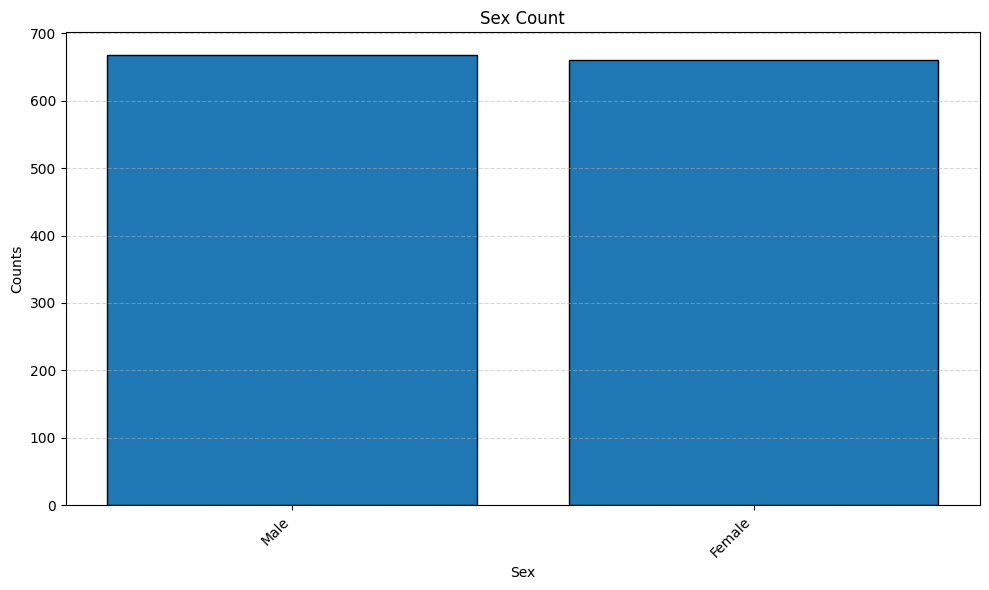

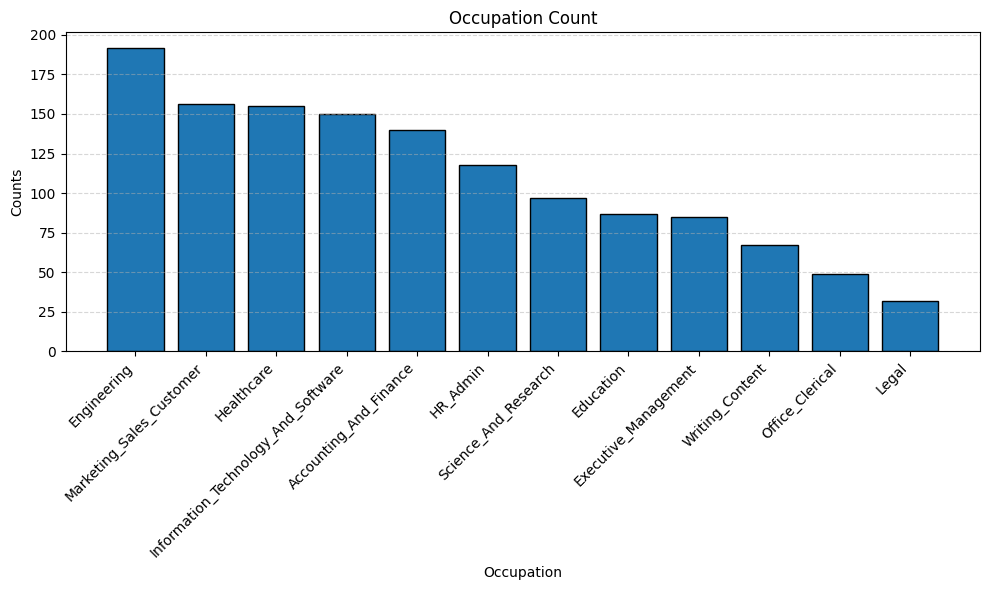

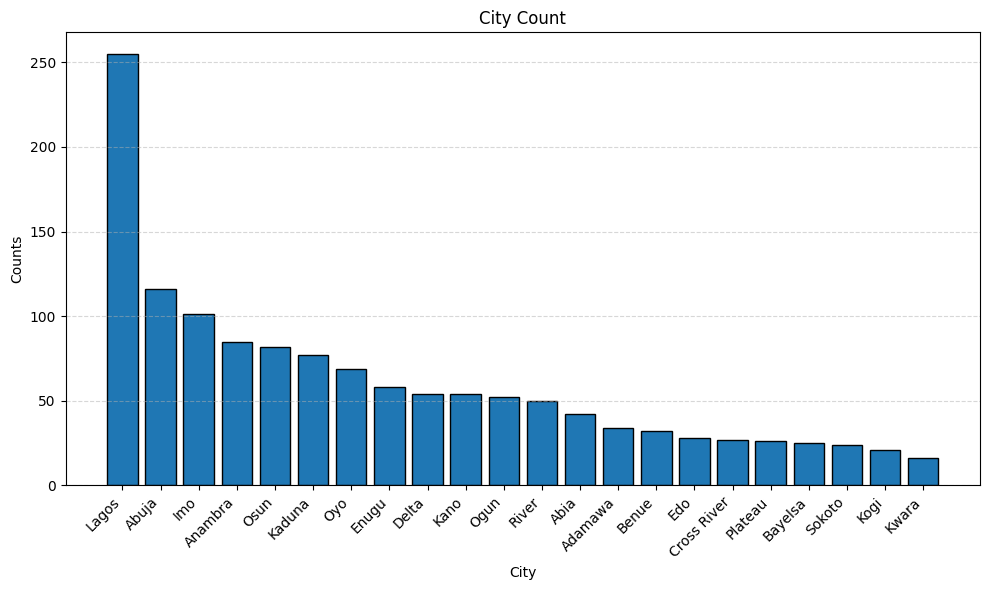

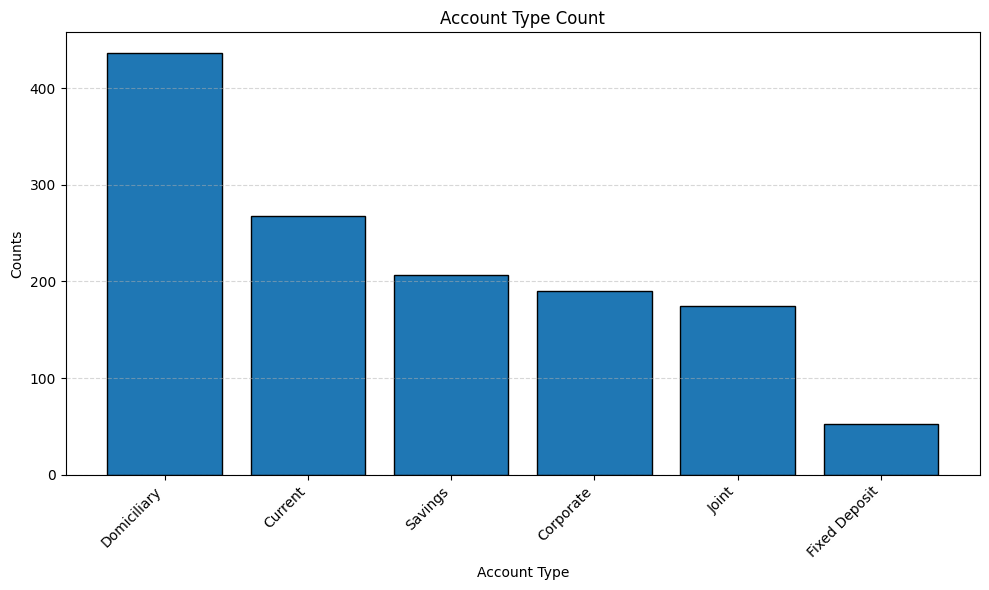

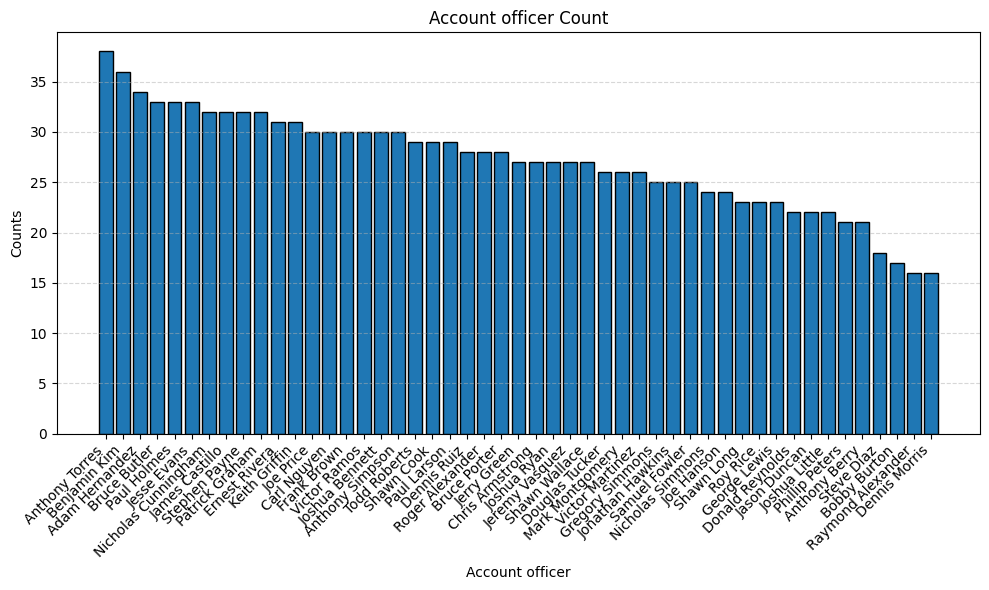

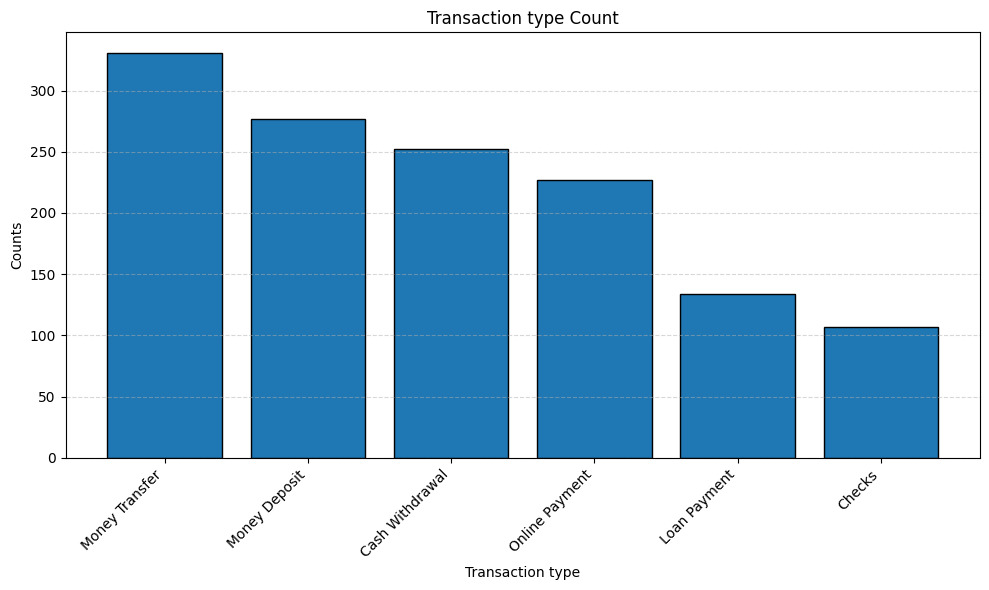

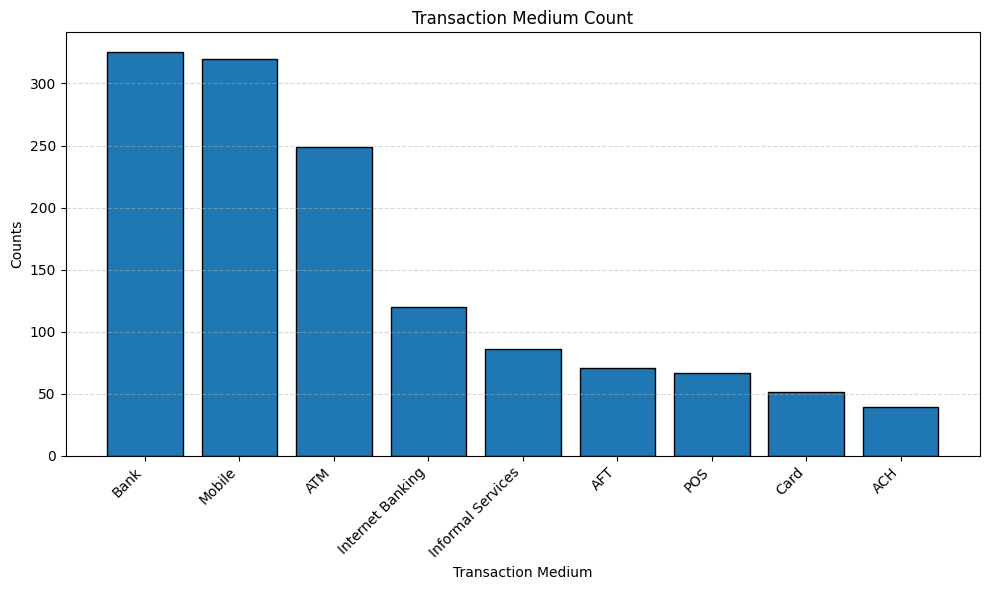

In [60]:
not_plot = ['Customer_id', 'City id', 'Transaction_id', 'Full name']
for col in cateCol:
    if col not in not_plot:
        bar_chat(col)

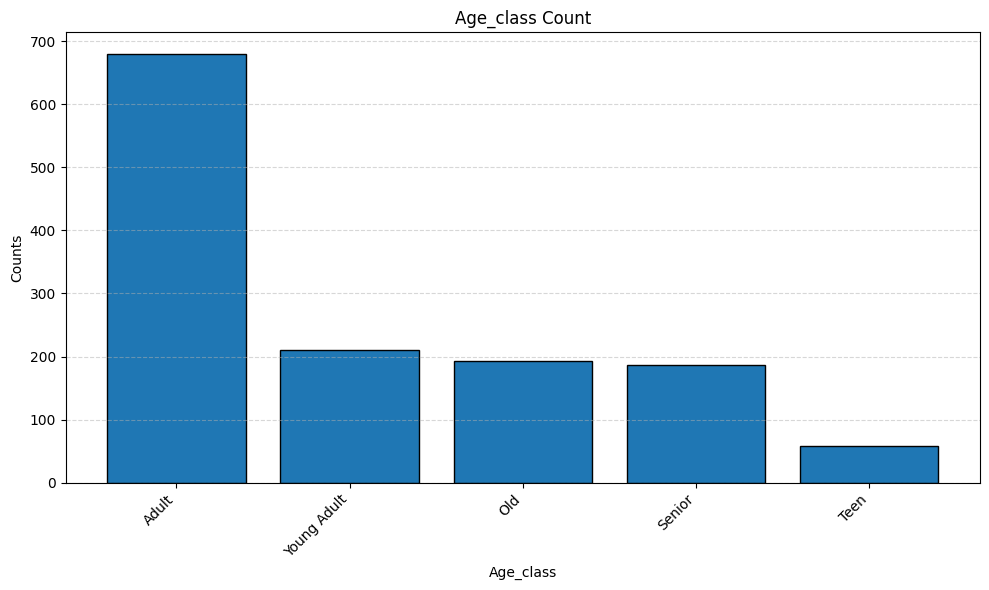

In [61]:
bar_chat('Age_class')

## Bivariant

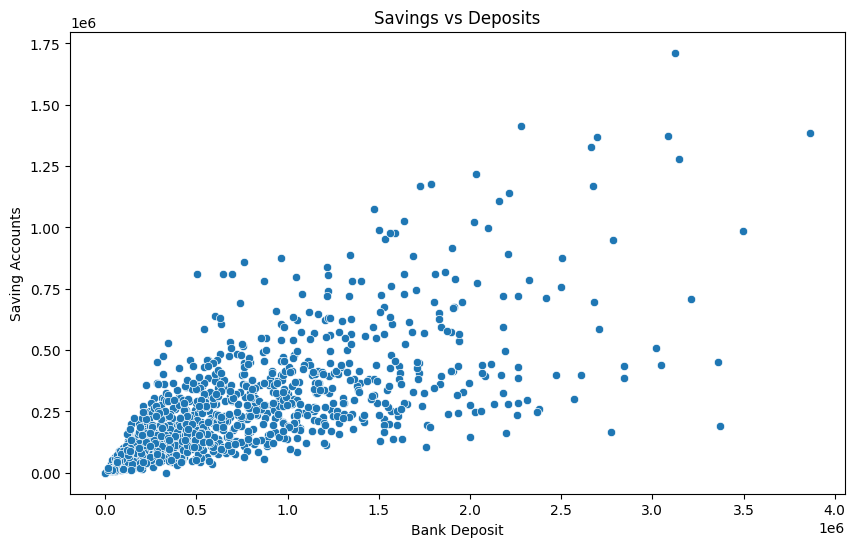

In [62]:
plt.figure(figsize=[10,6])
sb.scatterplot(data= dfx_all, x= 'Bank Deposit', y= 'Saving Accounts')
plt.xlabel('Bank Deposit')
plt.ylabel('Saving Accounts')
plt.title('Savings vs Deposits');

In [63]:
Top_10_Cus = dfx_all[['Full name', 'Bank Deposit', 'Saving Accounts']].nlargest(n= 10, columns = ['Bank Deposit', 'Saving Accounts'])
Top_10_Cus

,Full name,Bank Deposit,Saving Accounts
524,Harry Burns,3863355.50,1385917.65
629,Wayne Hart,3498983.55,986230.74
1119,William Perry,3368735.54,188649.19
943,Fred Cole,3359892.50,452480.26
1239,Terry Harrison,3210118.00,708475.09
499,Michael Bishop,3144472.59,1277139.63
246,Michael Patterson,3123544.47,1712270.28
474,Harold Marshall,3085020.89,1371926.94
986,Gary Hunt,3047678.11,438710.35
1063,Martin Baker,3017361.21,508084.69


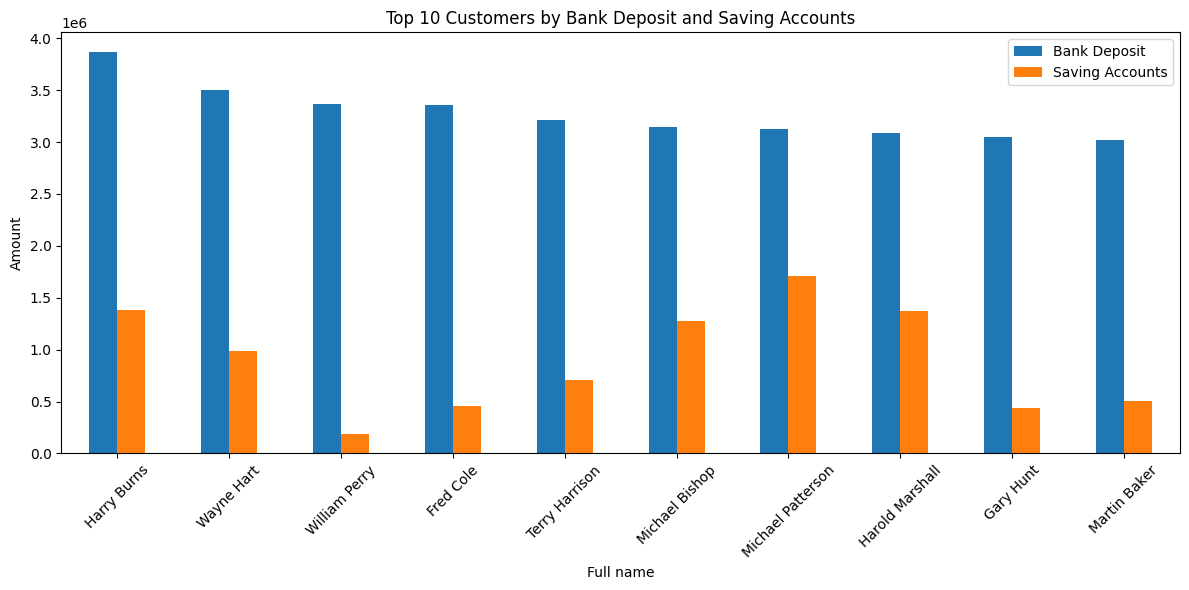

In [64]:
Top_10_Cus.plot(
    x='Full name',
    y=['Bank Deposit', 'Saving Accounts'],
    kind='bar',
    figsize=(12,6)
)
plt.title("Top 10 Customers by Bank Deposit and Saving Accounts")
plt.xticks(rotation=45)
plt.ylabel("Amount")
plt.tight_layout()
plt.show()


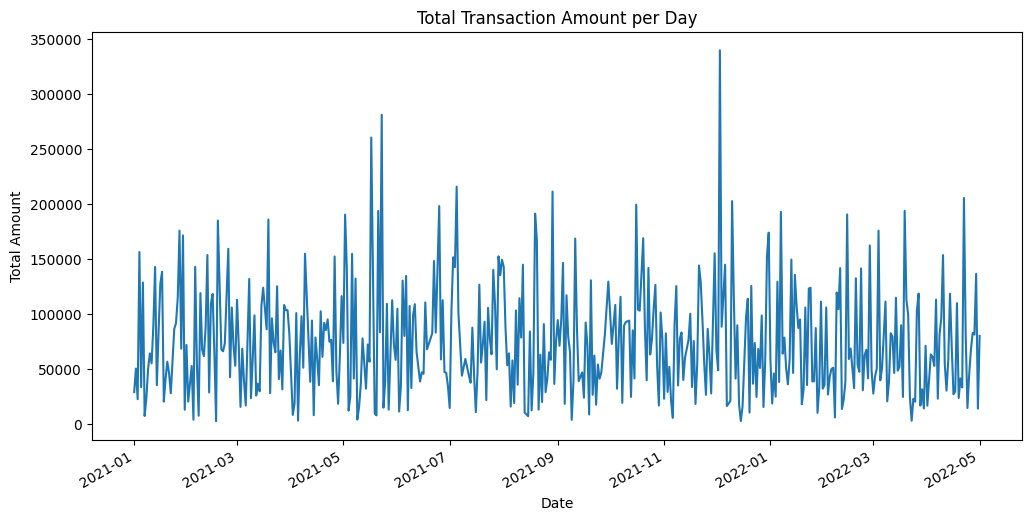

In [65]:
dfx_all.groupby('Date_of_transaction')['Amount'].sum().plot(kind = 'line', figsize = [12,6])
plt.title('Total Transaction Amount per Day')
plt.xlabel('Date')
plt.ylabel('Total Amount');

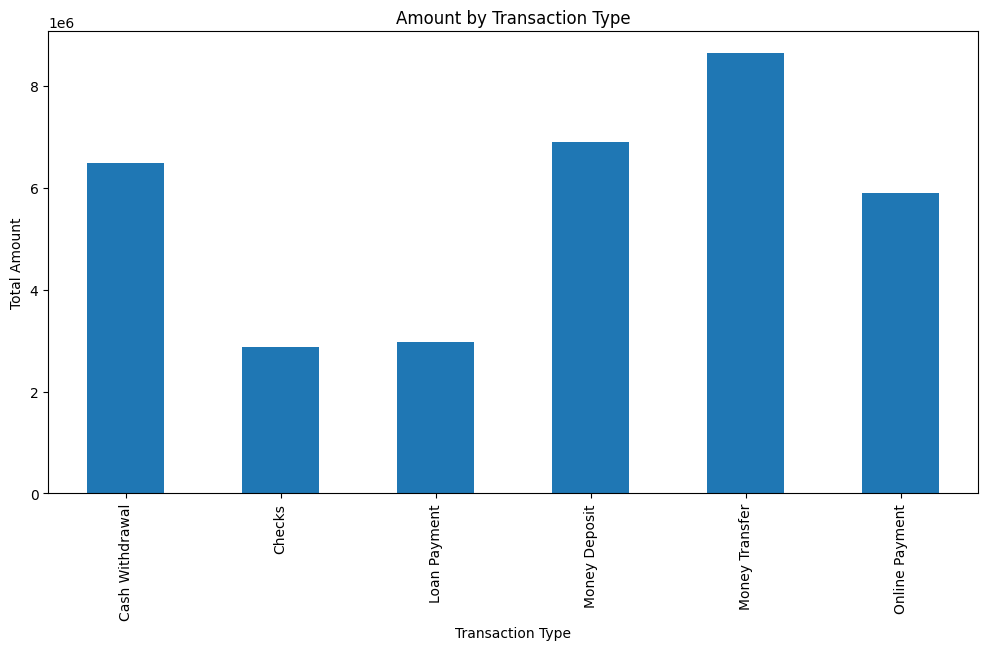

In [66]:
dfx_all.groupby('Transaction type')['Amount'].sum().plot(kind = 'bar', figsize = [12,6])
plt.title('Amount by Transaction Type')
plt.xlabel('Transaction Type')
plt.ylabel('Total Amount');

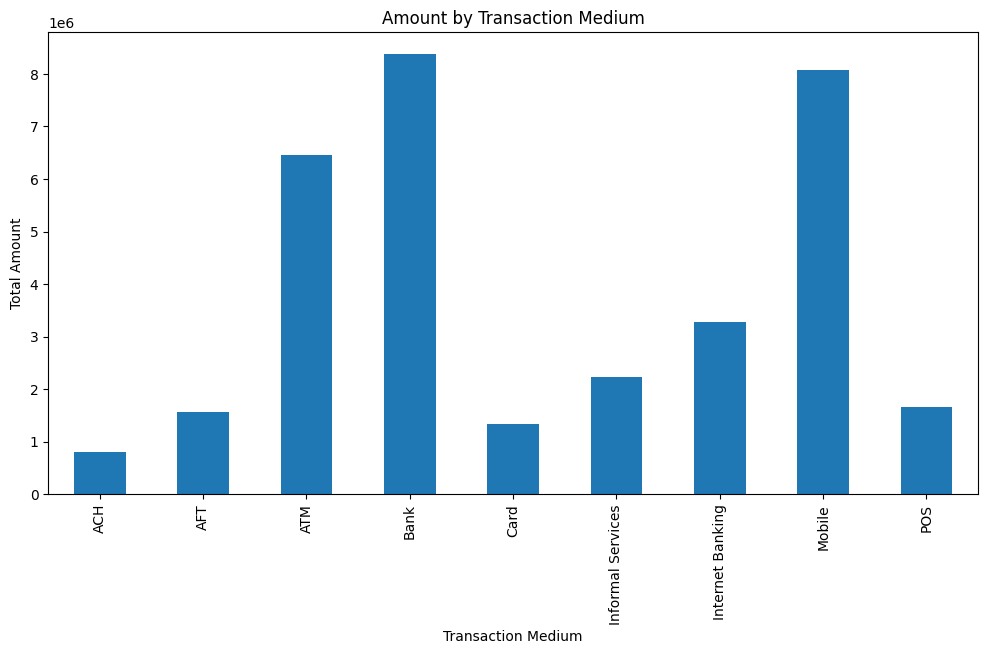

In [67]:
dfx_all.groupby('Transaction Medium')['Amount'].sum().plot(kind = 'bar', figsize = [12,6])
plt.title('Amount by Transaction Medium')
plt.xlabel('Transaction Medium')
plt.ylabel('Total Amount');

In [68]:
grp_sex_trans = pd.pivot_table(data= dfx_all, index= 'Sex', columns= ['Transaction Medium'], values= 'Amount', aggfunc= 'mean')
grp_sex_trans

Transaction Medium,ACH,AFT,ATM,Bank,Card,Informal Services,Internet Banking,Mobile,POS
Sex,,,,,,,,,
Female,23184.993889,23053.776875,25096.247059,24096.809818,28290.694800,27262.560000,25702.497742,24175.308503,22882.936857
Male,18185.058095,20997.097949,26623.575231,27490.965625,24534.992692,25101.779592,28997.601034,26424.532418,26889.370937


Text(0, 0.5, 'Amount')

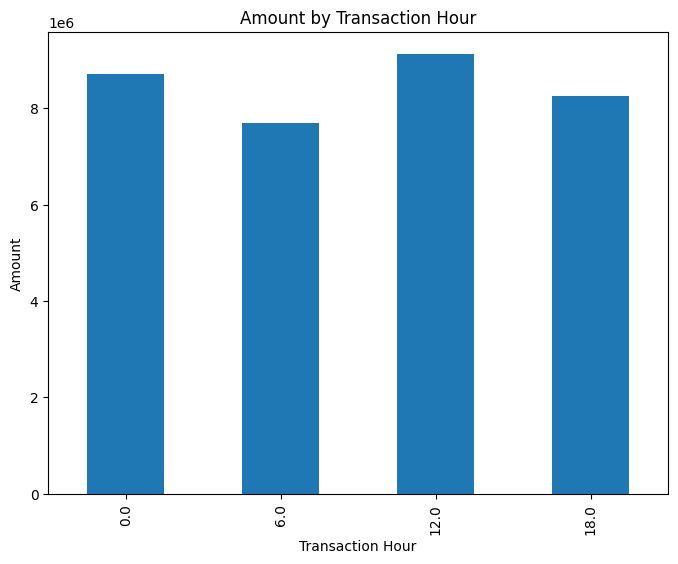

In [69]:
dfx_all.groupby('Transaction Hour')['Amount'].sum().plot(kind = 'bar', figsize = [8,6])
plt.title('Amount by Transaction Hour')
plt.xlabel('Transaction Hour')
plt.ylabel('Amount')

In [70]:
pd.pivot_table(data= dfx_all, index= 'Account officer', columns= ['Account Type'], values= 'Customer_id', 
               aggfunc= 'count', fill_value= 0, margins= True, margins_name= 'Total Account Manage')

Account Type,Corporate,Current,Domiciliary,Fixed Deposit,Joint,Savings,Total Account Manage
Account officer,,,,,,,
Adam Hernandez,6,9,10,0,6,3,34
Anthony Berry,3,2,6,0,7,3,21
Anthony Simpson,5,8,10,1,4,2,30
Anthony Torres,5,6,11,1,2,13,38
Benjamin Kim,6,6,14,2,4,4,36
Bobby Burton,2,3,8,0,1,3,17
Bruce Butler,4,8,10,3,5,3,33
Bruce Porter,2,6,9,1,3,7,28
Carl Nguyen,2,7,8,2,3,8,30


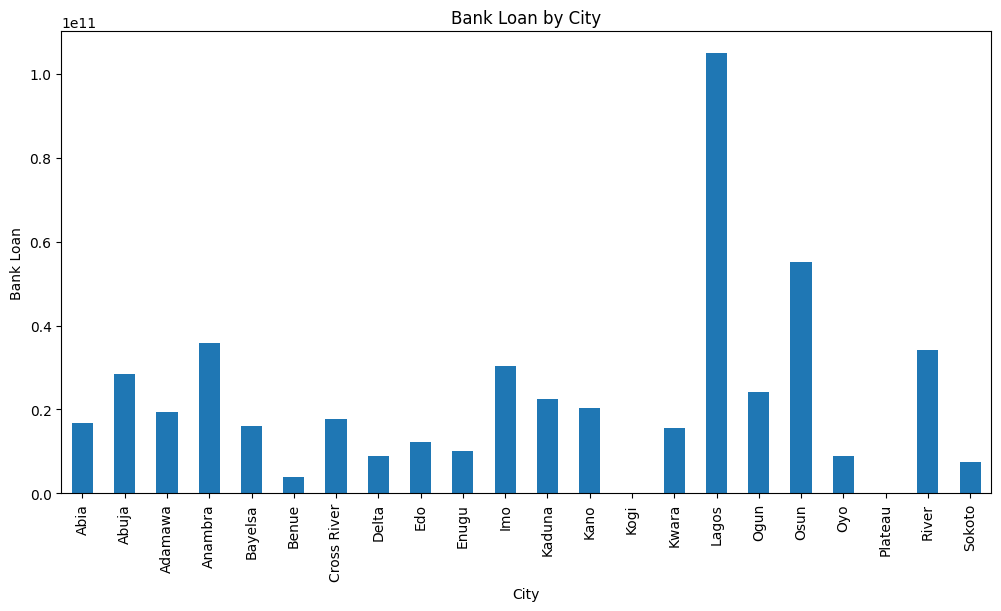

In [71]:
dfx_all.groupby('City')['Bank Loans'].sum().plot(kind = 'bar', figsize = [12,6]);
plt.title('Bank Loan by City')
plt.xlabel('City')
plt.ylabel('Bank Loan');

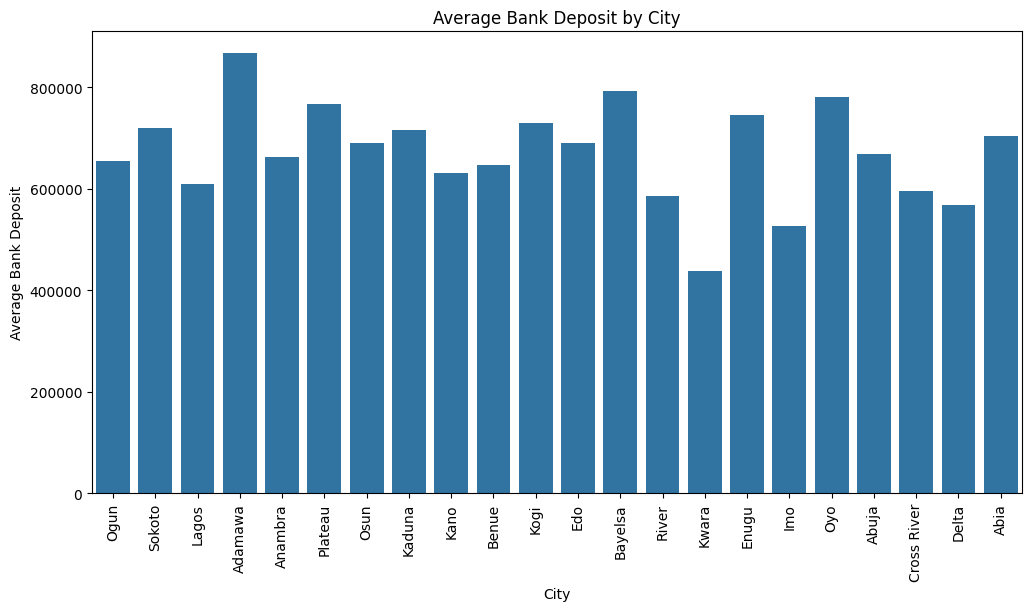

In [72]:
plt.figure(figsize=[12,6])
sb.barplot(data = dfx_all, x = 'City', y= 'Bank Deposit', errorbar= None)
plt.title('Average Bank Deposit by City')
plt.xlabel('City')
plt.ylabel('Average Bank Deposit')
plt.xticks(rotation = 90);


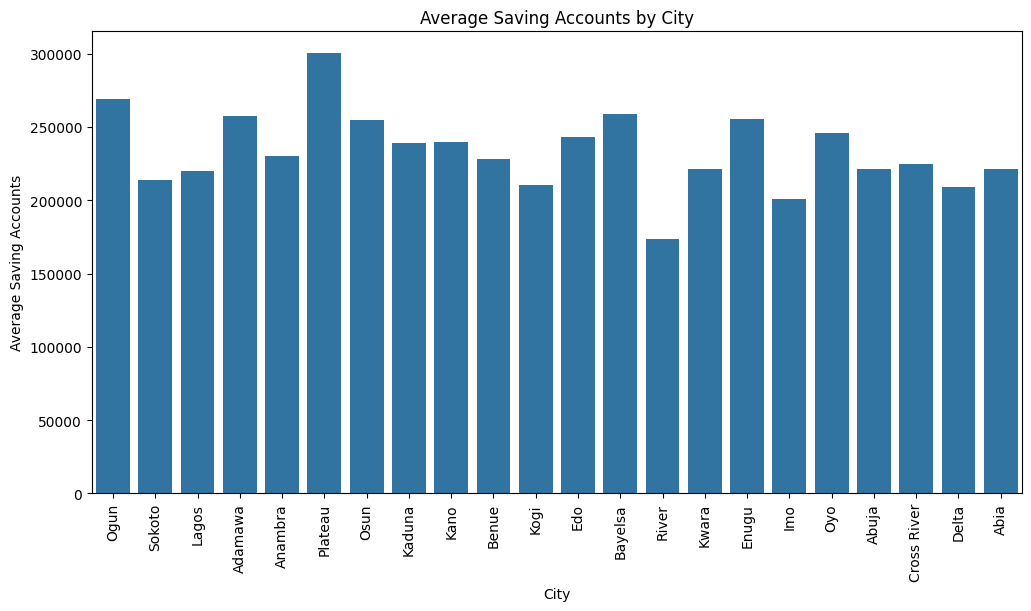

In [73]:
plt.figure(figsize=[12,6])
sb.barplot(data = dfx_all, x = 'City', y= 'Saving Accounts', errorbar= None)
plt.title('Average Saving Accounts by City')
plt.xlabel('City')
plt.ylabel('Average Saving Accounts')
plt.xticks(rotation = 90);

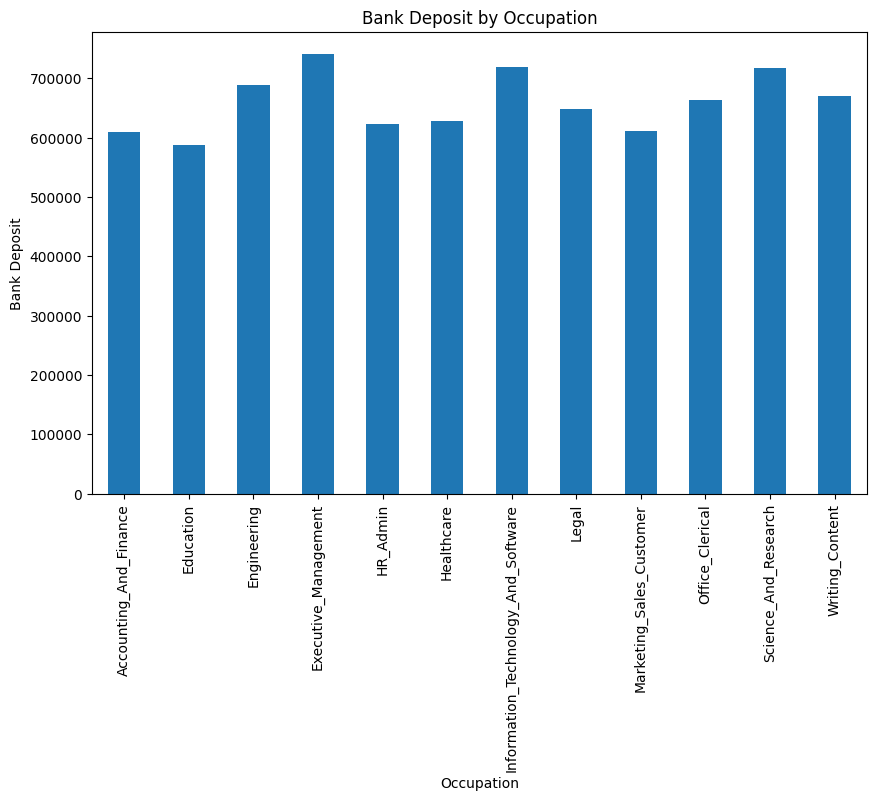

In [74]:
dfx_all.groupby('Occupation')['Bank Deposit'].mean().plot(kind = 'bar', figsize = [10,6],
                                                         xlabel = 'Occupation', ylabel = 'Bank Deposit', title = 'Bank Deposit by Occupation');